In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
func = lambda x: 0.5*np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

In [3]:
dat_file = np.load('data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
#A_test = dat_file['A_test']
#b_test = dat_file['b_test']
x0 = np.random.rand(28)


In [4]:
def ternary_search(xk, zk, func):
    a = 0.
    b = 1. 
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk*c+zk*(1-c)) >= func(xk*d+zk*(1-d)):
            a = c
        else:
            b = d 
    print((b + a)/2)
    return (b+a)/2


In [5]:
def a_next(ak, L):
    return 1 / L * 0.5 + (1 / L**2 * 0.25 + ak**2)**0.5


In [6]:
def y_next(xk, zk):
    return ternary_search(xk, zk, func)


In [7]:
def x_next(xk, grad, ak_next, yk_next):
    return xk - ak_next * grad(yk_next)


In [8]:
def fast_grad_step_v3(ak_next, xk_next, a_bigk, zk):
    return (ak_next * xk_next + a_bigk * zk) / (a_bigk + ak_next)

In [11]:
xk = x0
zk= x0
yk = x0
L = np.amax(np.linalg.eigh(A.T @ A)[0])
ak = 1 / L
res = [func(xk)]
#while True:
for i in range(1,100):
    a_bigk = 1000 / i**0.5
    ak = a_next(ak, L) 
    alpha = ternary_search(xk, zk, func)
    yk = xk * alpha + zk * (1 - alpha)
    xk = x_next(xk, grad, ak, yk)
    zk = xk * alpha + zk * (1 - alpha)
    res.append(func(zk))
    
#print(zk)
   # if abs(res[-1] - res[-2]) < 1e-9:
      #  break


0.9996616802577005
0.9996616802577005
0.0003383197422994323
0.38976510093662076
0.07697079748407419
0.08708668993497656
0.23404014649312982
0.09131122644367938
0.1239578013128779
0.0919984384202251
0.07993638147516764
0.07697079748407419
0.06001954119674863
0.05137025161309937
0.05175086132318624
0.05735296049352723
0.06723914903736544
0.0755976950924761
0.0723231961023104
0.05389179094242483
0.03642124358580323
0.025537193516887026
0.018838859087806276
0.014765806565279517
0.012531046080012565
0.010337254001039683
0.00931172228219453
0.008592792829808236
0.008410417343724948
0.008029807633638086
0.008410417343724948
0.008931112572107668
0.009787484419803106
0.010908168566169975
0.013058349115862069
0.01567504087270924
0.018838859087806276
0.02231786971906899
0.02391431600304443
0.023343401437914142
0.020391033061754257
0.016700572591554393
0.013481248793736359
0.011500228115193982
0.009787484419803106
0.008410417343724948
0.007554045496029511
0.00717343578594265
0.006412216365768927
0

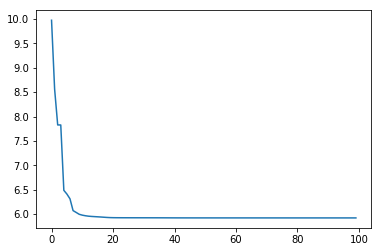

In [12]:
plt.plot(np.log(res))
plt.show()
